**Reto 1**

In [313]:
#Libretias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Trea datos
df = pd.read_csv('Colom_Chile_17_20.csv', sep=",", index_col=None)
df.head(5)


Country or Area  Year   Area         Sex    Age  \
0           Chile  2020  Total  Both Sexes  Total   
1           Chile  2020  Total  Both Sexes      0   
2           Chile  2020  Total  Both Sexes      1   
3           Chile  2020  Total  Both Sexes  1 - 4   
4           Chile  2020  Total  Both Sexes      2   

                            Record Type             Reliability  Source Year  \
0  Data tabulated by year of occurrence  Final figure, complete       2023.0   
1  Data tabulated by year of occurrence  Final figure, complete       2023.0   
2  Data tabulated by year of occurrence  Final figure, complete       2023.0   
3  Data tabulated by year of occurrence  Final figure, complete       2023.0   
4  Data tabulated by year of occurrence  Final figure, complete       2023.0   

      Value Value Footnotes  
0  126169.0             NaN  
1    1088.0             NaN  
2      80.0             NaN  
3     216.0             NaN  
4      50.0             NaN

In [314]:
#Eliminar datos que generan ruido para poder graficar
df.drop(df[(df.loc[:,'Country or Area'] == 'footnoteSeqID')].index, inplace=True)
df.drop(df[(df.loc[:,'Country or Area'] == '1')].index, inplace=True)
df.drop(df[(df.loc[:,'Country or Area'] == '2')].index, inplace=True)
# ultimo_indice = df.index[-1]
# df.loc[ultimo_indice, 'Year'] = '2020'
df

Country or Area  Year   Area         Sex      Age  \
0             Chile  2020  Total  Both Sexes    Total   
1             Chile  2020  Total  Both Sexes        0   
2             Chile  2020  Total  Both Sexes        1   
3             Chile  2020  Total  Both Sexes    1 - 4   
4             Chile  2020  Total  Both Sexes        2   
..              ...   ...    ...         ...      ...   
952        Colombia  2017  Rural      Female  85 - 89   
953        Colombia  2017  Rural      Female  90 - 94   
954        Colombia  2017  Rural      Female  95 - 99   
955        Colombia  2017  Rural      Female    100 +   
956        Colombia  2017  Rural      Female  Unknown   

                              Record Type             Reliability  \
0    Data tabulated by year of occurrence  Final figure, complete   
1    Data tabulated by year of occurrence  Final figure, complete   
2    Data tabulated by year of occurrence  Final figure, complete   
3    Data tabulated by year of occurrence  Final figure, complete   
4    Data tabulated by year of occurrence  Final figure, complete   
..                                    ...                     ...   
952          Vital statistics from census          Other estimate   
953          Vital statistics from census          Other estimate   
954          Vital statistics from census          Other estimate   
955          Vital statistics from census          Other estimate   
956          Vital statistics from census          Other estimate   

     Source Year     Value Value Footnotes  
0         2023.0  126169.0             NaN  
1         2023.0    1088.0             NaN  
2         2023.0      80.0             NaN  
3         2023.0     216.0             NaN  
4         2023.0      50.0             NaN  
..           ...       ...             ...  
952       2020.0    2875.0               2  
953       2020.0    1580.0               2  
954       2020.0    1029.0               2  
955       2020.0     361.0               2  
956       2020.0       5.0             1,2  

[957 rows x 10 columns]

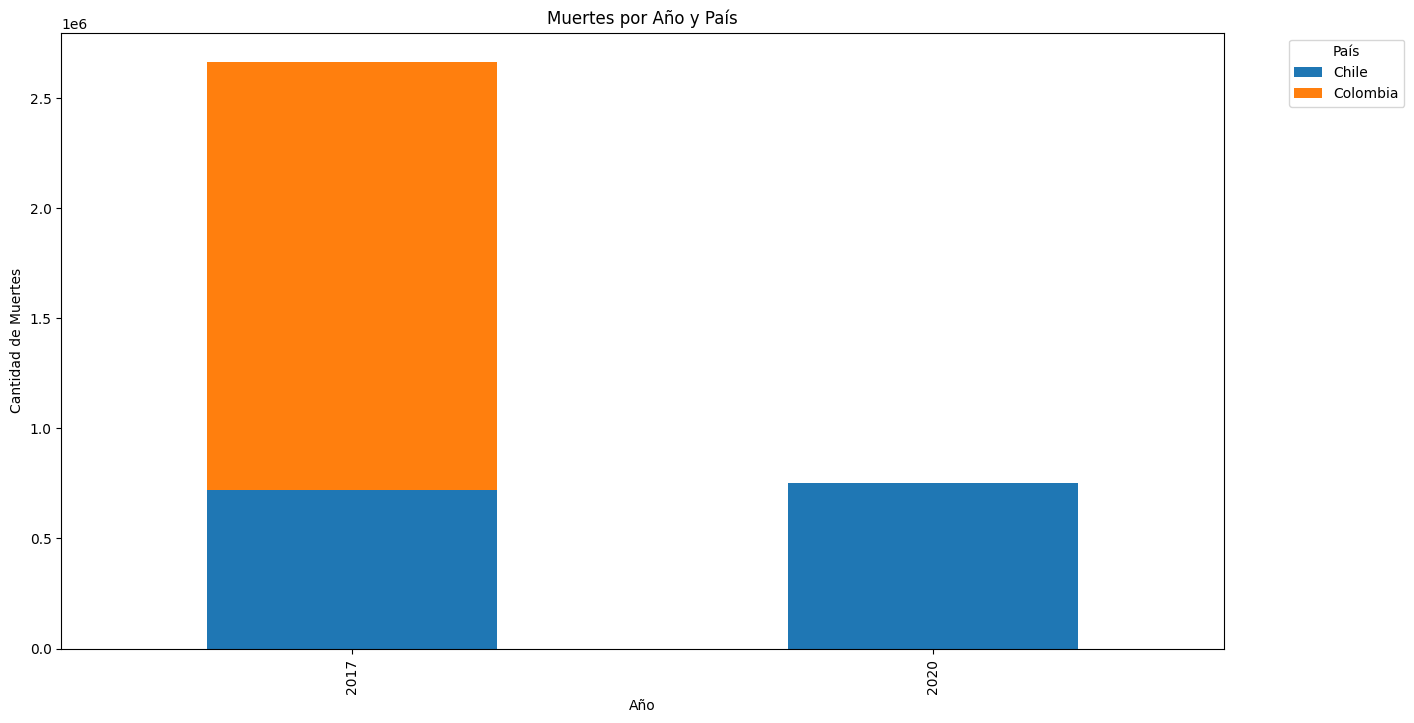

In [315]:
# Agrupar por año y país y sumar las muertes
muertes_por_anio_pais = df.groupby(['Year', 'Country or Area'])['Value'].sum().unstack()

# Graficar las muertes por año y por país
muertes_por_anio_pais.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Muertes por Año y País')
plt.xlabel('Año')
plt.ylabel('Cantidad de Muertes')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

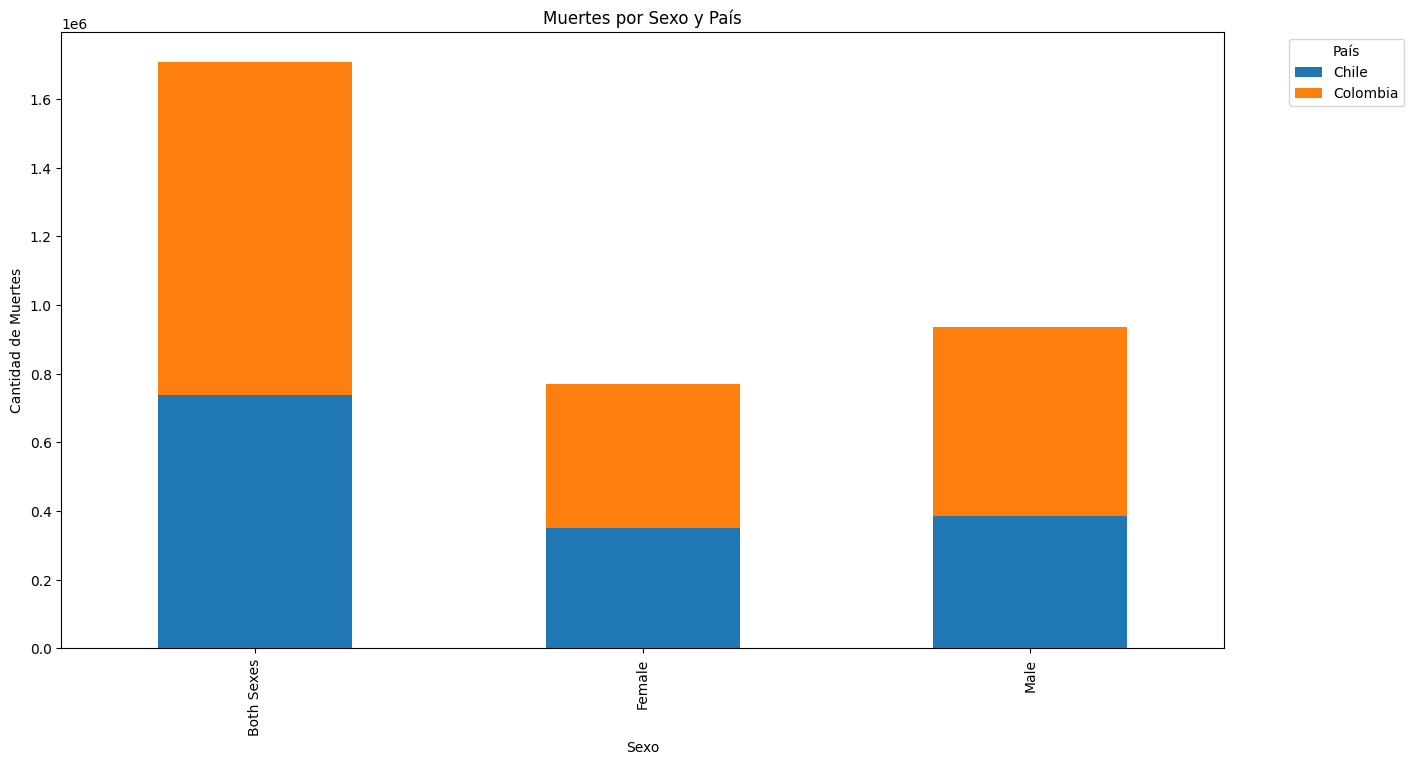

In [317]:
# Agrupar por sexo y país y sumar las muertes
muertes_por_sexo_pais = df.groupby(['Sex', 'Country or Area'])['Value'].sum().unstack()

# Graficar las muertes por sexo y por país
muertes_por_sexo_pais.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Muertes por Sexo y País')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Muertes')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

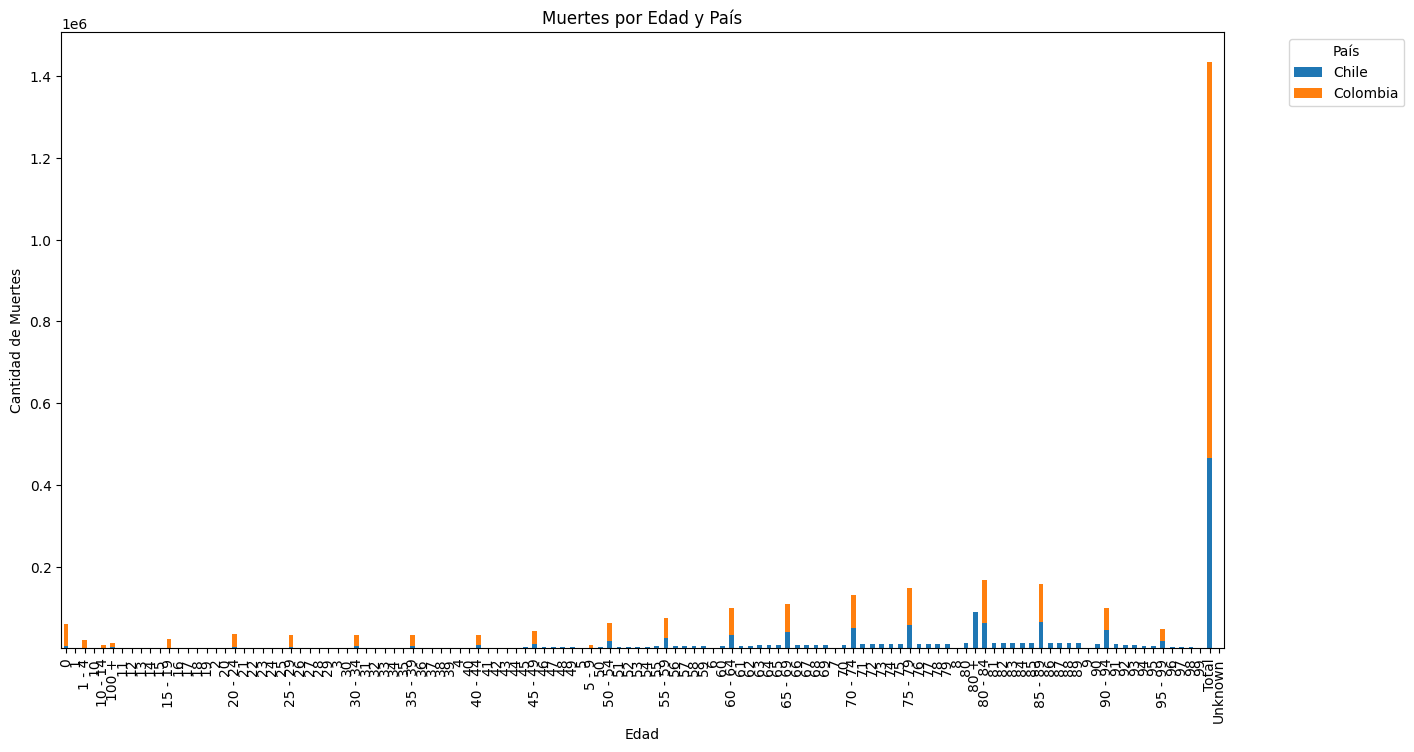

In [318]:
# Agrupar por edad y país y sumar las muertes
muertes_por_edad_pais = df.groupby(['Age', 'Country or Area'])['Value'].sum().unstack()

# Graficar las muertes por edad y por país
muertes_por_edad_pais.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Muertes por Edad y País')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Muertes')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Reto 2**

In [306]:
#Libretias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Trea datos
df2 = pd.read_csv('database.csv')
df2.head(5)

<ipython-input-306-e24ad7aa8a01>:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('database.csv')


Record ID Agency Code Agency Name       Agency Type       City   State  \
0          1     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
1          2     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
2          3     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
3          4     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
4          5     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   

   Year    Month  Incident              Crime Type  ... Victim Ethnicity  \
0  1980  January         1  Murder or Manslaughter  ...          Unknown   
1  1980    March         1  Murder or Manslaughter  ...          Unknown   
2  1980    March         2  Murder or Manslaughter  ...          Unknown   
3  1980    April         1  Murder or Manslaughter  ...          Unknown   
4  1980    April         2  Murder or Manslaughter  ...          Unknown   

  Perpetrator Sex  Perpetrator Age               Perpetrator Race  \
0            Male               15  Native American/Alaska Native   
1            Male               42                          White   
2         Unknown                0                        Unknown   
3            Male               42                          White   
4         Unknown                0                        Unknown   

  Perpetrator Ethnicity  Relationship         Weapon Victim Count  \
0               Unknown  Acquaintance   Blunt Object            0   
1               Unknown  Acquaintance  Strangulation            0   
2               Unknown       Unknown        Unknown            0   
3               Unknown  Acquaintance  Strangulation            0   
4               Unknown       Unknown        Unknown            0   

  Perpetrator Count Record Source  
0                 0           FBI  
1                 0           FBI  
2                 0           FBI  
3                 0           FBI  
4                 1           FBI  

[5 rows x 24 columns]

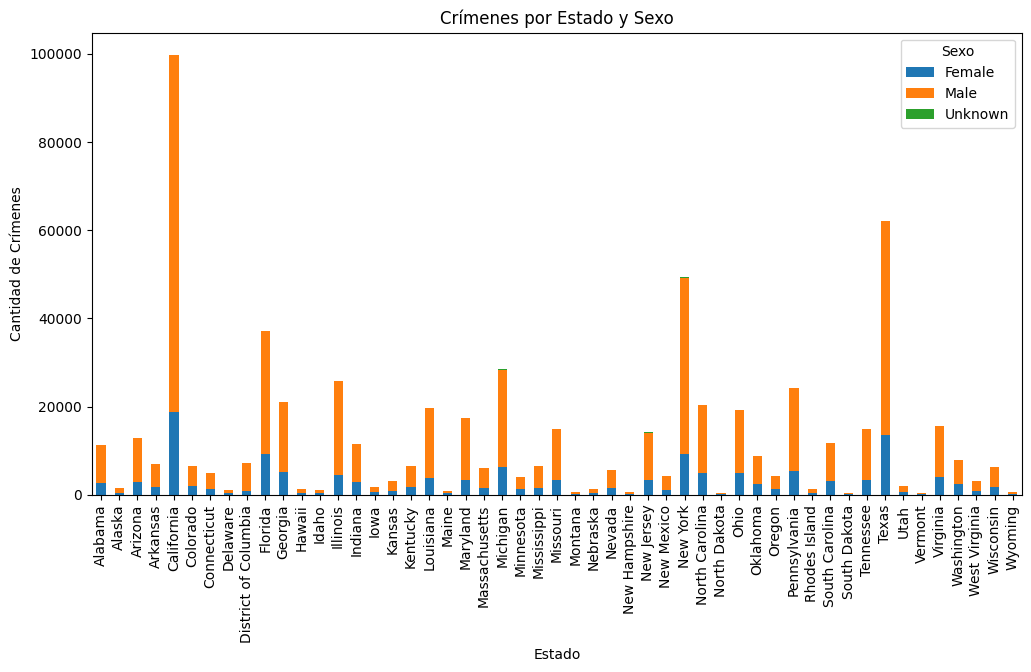

In [307]:
# Agrupar por estado y sexo, y contar la cantidad de crímenes
crimenes_por_estado_sexo = df2.groupby(['State', 'Victim Sex']).size().unstack()

# Graficar los estados más afectados por crímenes según el sexo
crimenes_por_estado_sexo.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Crímenes por Estado y Sexo')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Crímenes')
plt.legend(title='Sexo')
plt.show()

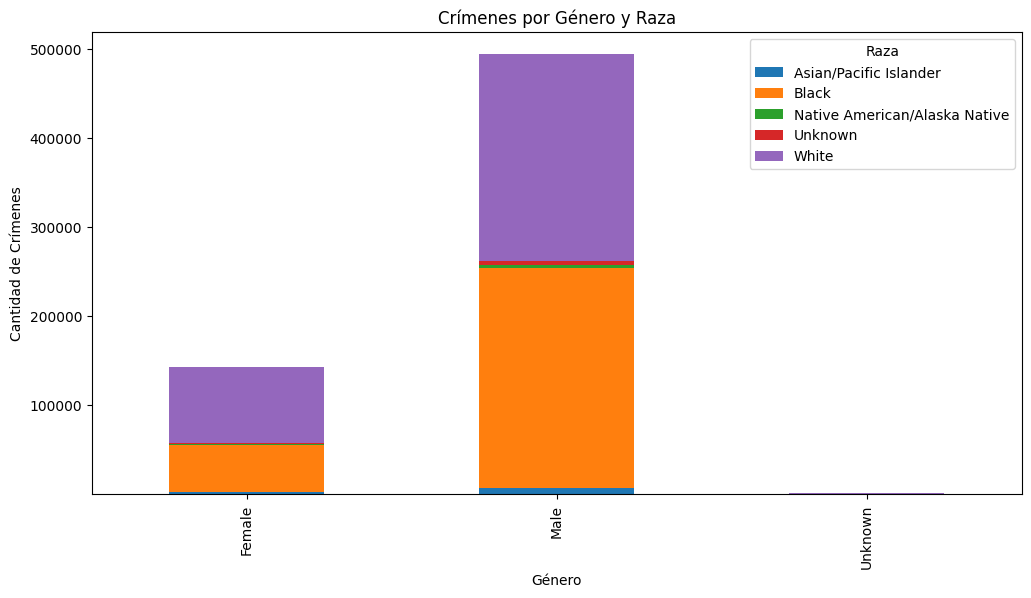

In [308]:

# Agrupar por género y raza, y contar la cantidad de crímenes
crimenes_por_genero_raza = df2.groupby(['Victim Sex', 'Victim Race']).size().unstack()

# Graficar el número de crímenes según el género y la raza
crimenes_por_genero_raza.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Crímenes por Género y Raza')
plt.xlabel('Género')
plt.ylabel('Cantidad de Crímenes')
plt.legend(title='Raza')
plt.show()

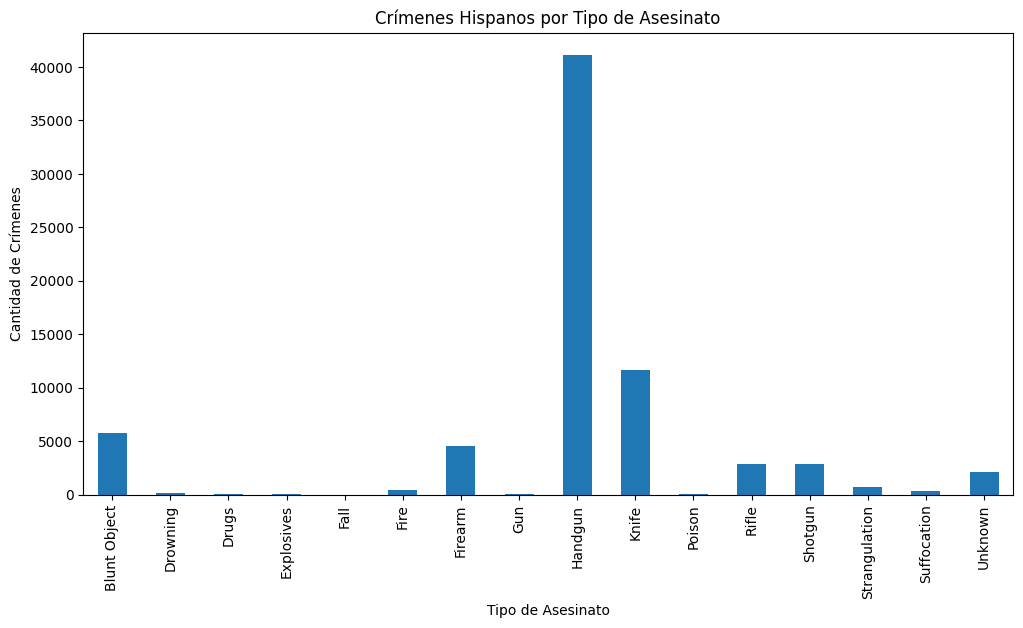

In [309]:
# Filtrar datos para incluir solo crímenes hispanos
crimenes_hispanos = df2[df2['Victim Ethnicity'] == 'Hispanic']

# Agrupar por tipo de asesinato y contar la cantidad de crímenes
crimenes_por_tipo_asesinato = crimenes_hispanos.groupby('Weapon').size()

# Graficar los crímenes hispanos según el tipo de asesinato
crimenes_por_tipo_asesinato.plot(kind='bar', figsize=(12, 6))
plt.title('Crímenes Hispanos por Tipo de Asesinato')
plt.xlabel('Tipo de Asesinato')
plt.ylabel('Cantidad de Crímenes')
plt.show()

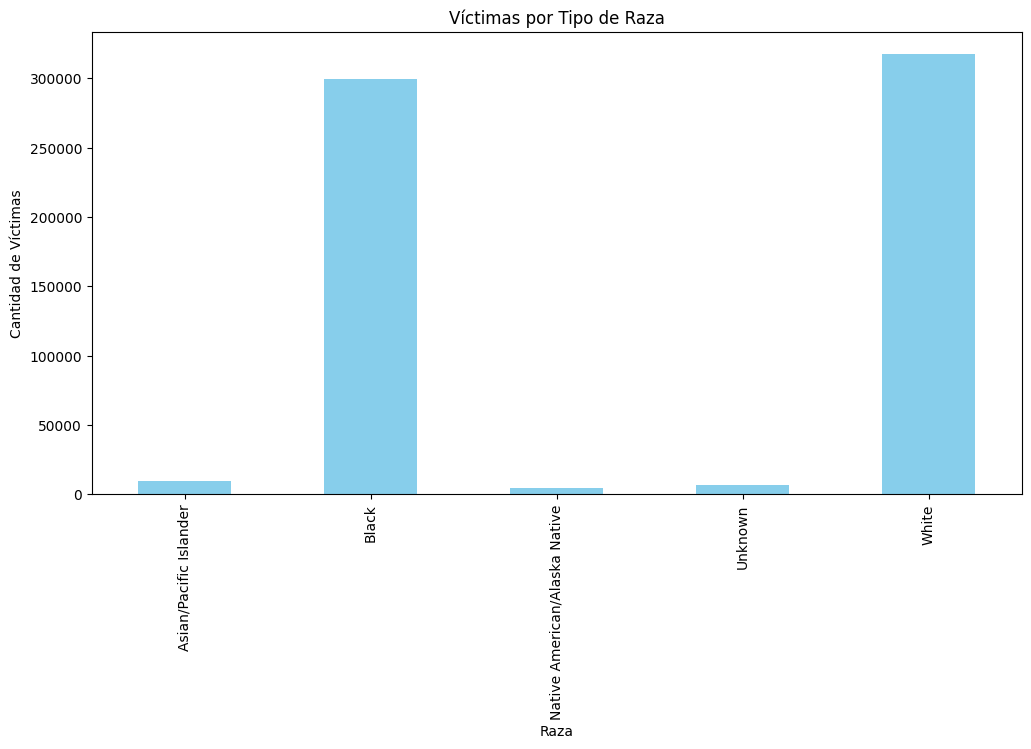

In [310]:
# Agrupar por raza y contar la cantidad de víctimas
victimas_por_raza = df2.groupby('Victim Race').size()

# Graficar las víctimas por tipo de raza
victimas_por_raza.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Víctimas por Tipo de Raza')
plt.xlabel('Raza')
plt.ylabel('Cantidad de Víctimas')
plt.show()

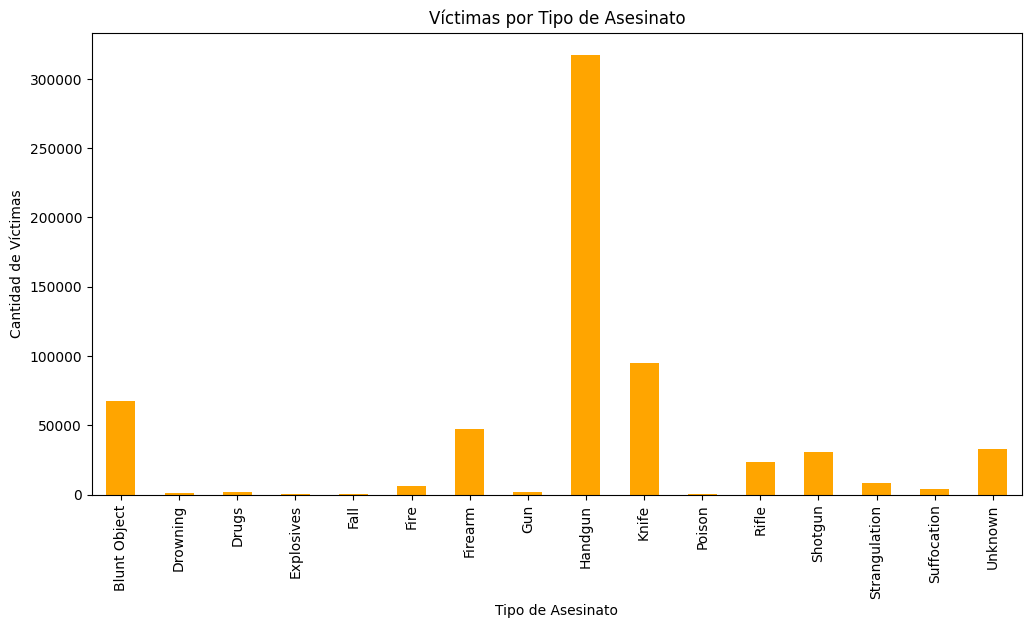

In [311]:
victimas_por_tipo_asesinato = df2.groupby('Weapon').size()

# Graficar las víctimas por tipo de asesinato
victimas_por_tipo_asesinato.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title('Víctimas por Tipo de Asesinato')
plt.xlabel('Tipo de Asesinato')
plt.ylabel('Cantidad de Víctimas')
plt.show()